# Fraud Loan Prediction

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the DataSet
loan=pd.read_csv('loan_prediction.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Assign the DataSet to the DataFrame
df=pd.DataFrame(loan)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# show the shape of the dataset i.e. no of rows, no of columns
df.shape

(614, 13)

In [5]:
# take a look at the features (i.e. independent variables) in the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# show the data types for each column of the train set
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Univariate analysis

In [8]:
# frequency table of a variable will give us the count of each category in that variable
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

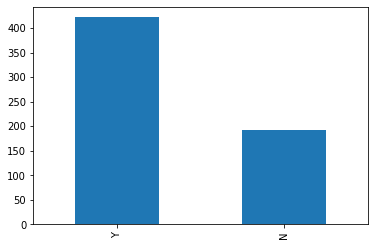

In [10]:
# bar plot to visualize the frequency
df['Loan_Status'].value_counts().plot.bar()

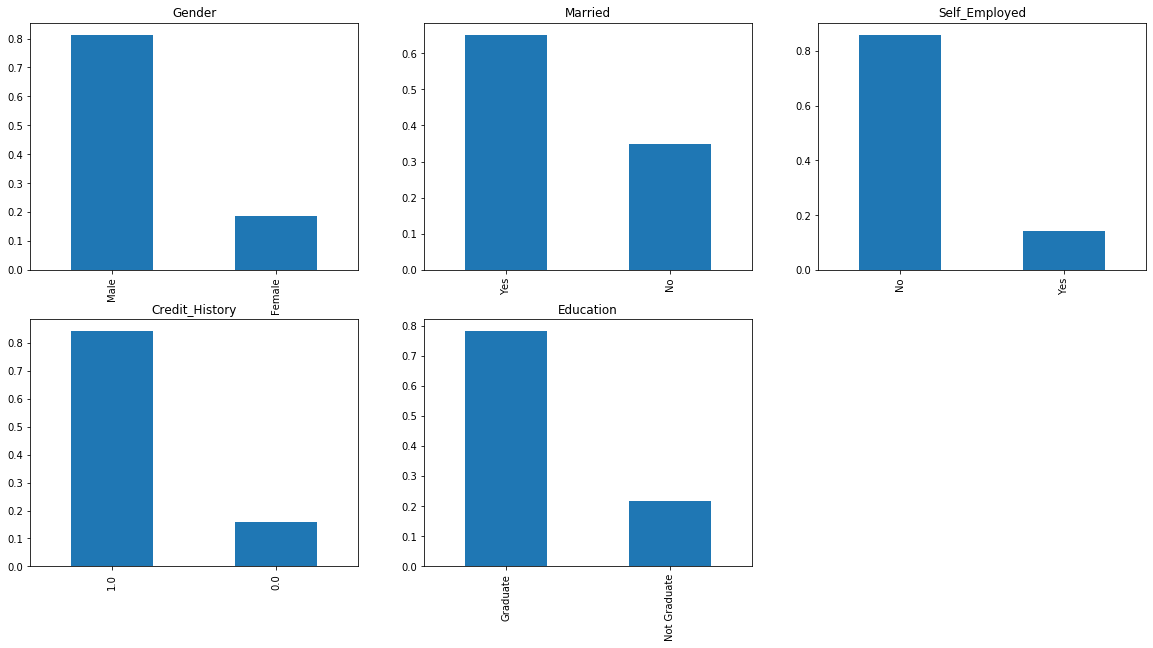

In [11]:
# Visualizing categorical features
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

80% applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 15% applicants in the dataset are self employed.

Around 85% applicants have credit history (repaid their debts).

Around 80% of the applicants are Graduate.

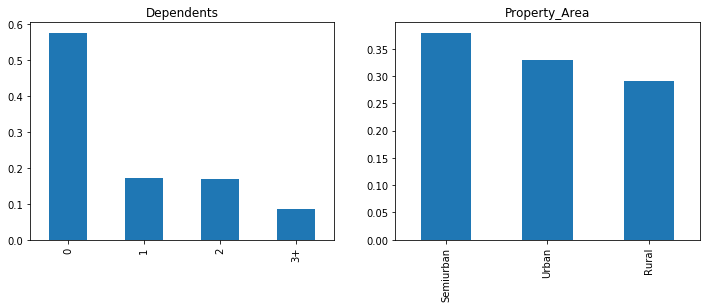

In [12]:
# Visualizing remaining categorical features
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

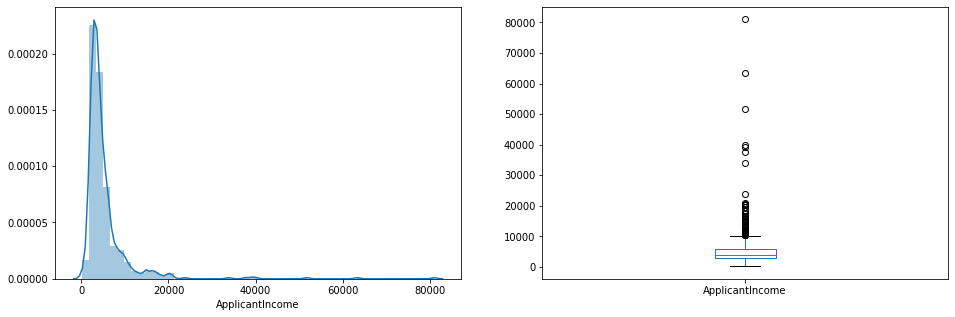

In [13]:
# Visualizing ApplicantIncome
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

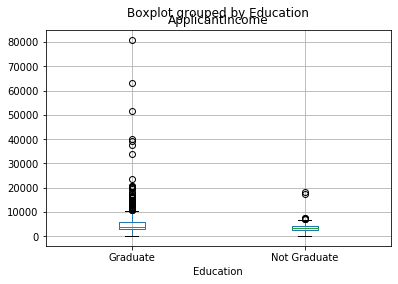

In [14]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

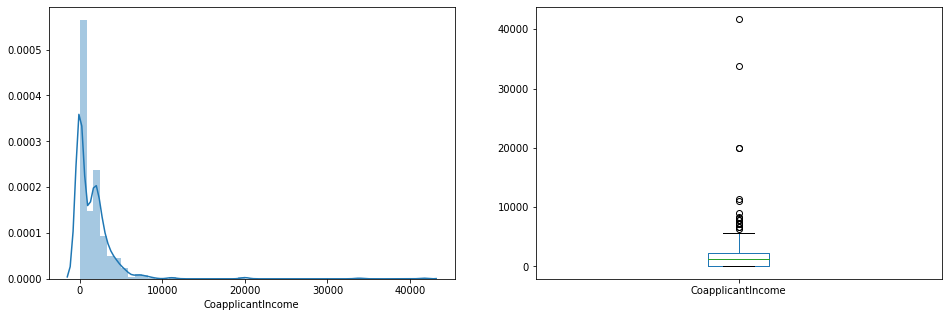

In [15]:
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

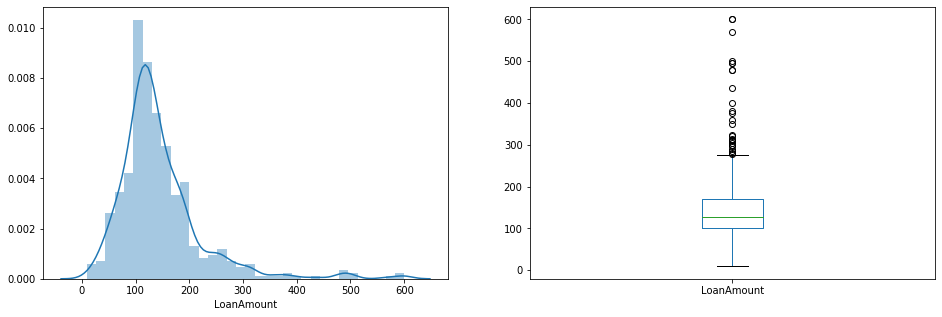

In [16]:
plt.subplot(121)
df=df.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [17]:
# frequency table of a variable will give us the count of each category in that variable
df['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

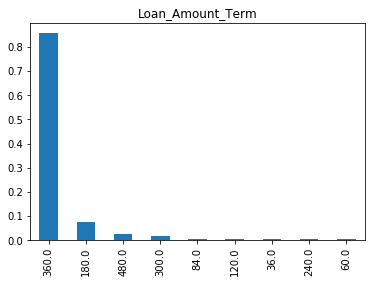

In [18]:
# plot bar chart
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

Around 85% of the loans are 360 months term or 30 years period

# Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


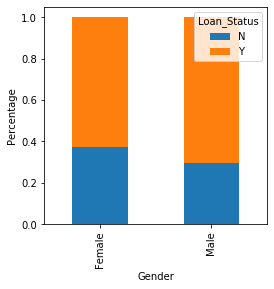

In [19]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


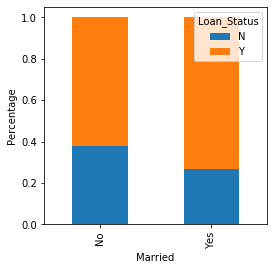

In [20]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28


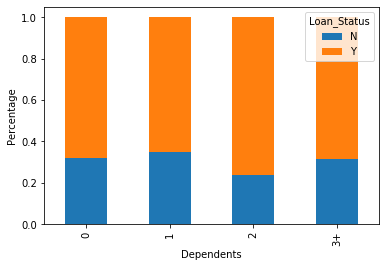

In [21]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61


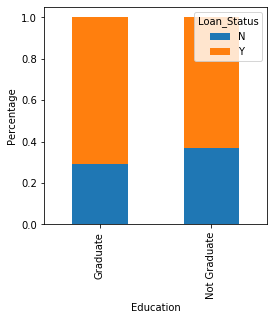

In [22]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43


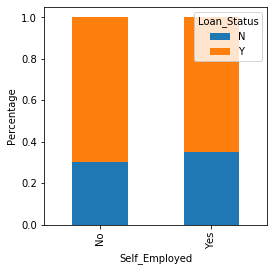

In [23]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325


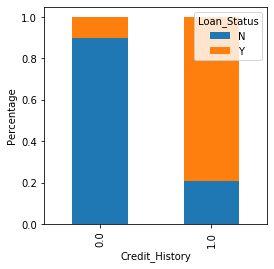

In [24]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98


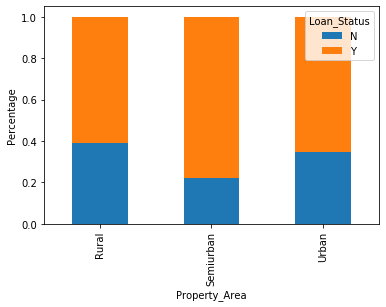

In [25]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

Proportion of male and female applicants is more or less same for both approved and unapproved loans

Proportion of married applicants is higher for the approved loans

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Proportion of loans getting approved for graduates is higher compared to non-graduates

It seems people with credit history as 1 are more likely to get their loans approved

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Loan_Status
N    5730.189189
Y    5201.093373
Name: ApplicantIncome, dtype: float64


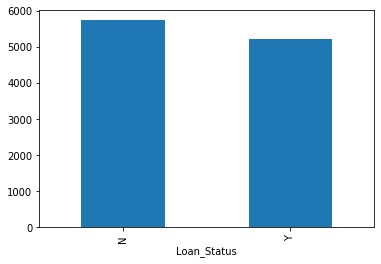

In [26]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [27]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [28]:
# take a look at the data set
df.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,High


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


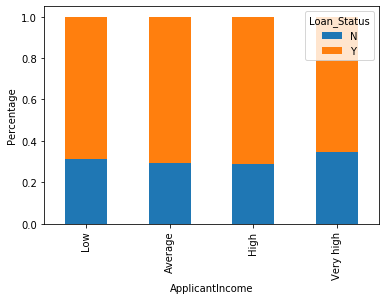

In [29]:
print(pd.crosstab(df['Income_bin'],df['Loan_Status']))

Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [30]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

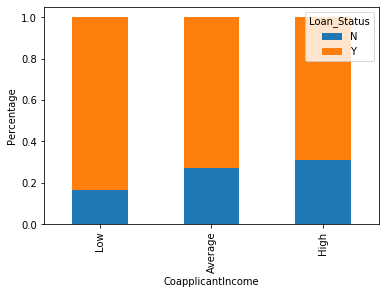

In [31]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [32]:
print(len(df[df["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(df[df["CoapplicantIncome"] == 0])/len(df["CoapplicantIncome"])

216


('Percentage of CoapplicantIncome = 0 is:', 0.45)

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.



Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [33]:
# create a new variable
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Total_Income_bin'] = pd.cut(df['Total_Income'],bins,labels=group)

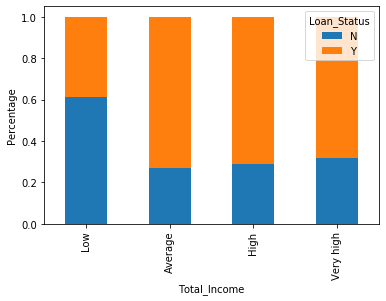

In [34]:
# plot the chart
Total_Income_bin = pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

In [35]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

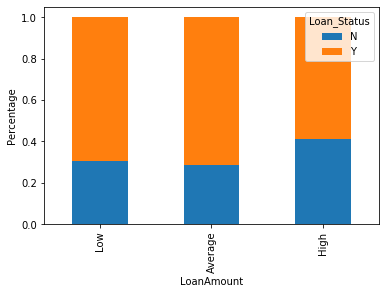

In [36]:
# plot the chart 
LoanAmount_bin = pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount.

Let’s drop the bins which we created for the exploration part.

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High,High,9613.0,Very high,High


In [38]:
# drop the new variable of bins
df = df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [40]:
# replacing 3+ in Dependents variable with 3 for both train and test set
df['Dependents'].replace('3+', 3, inplace=True)

In [41]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


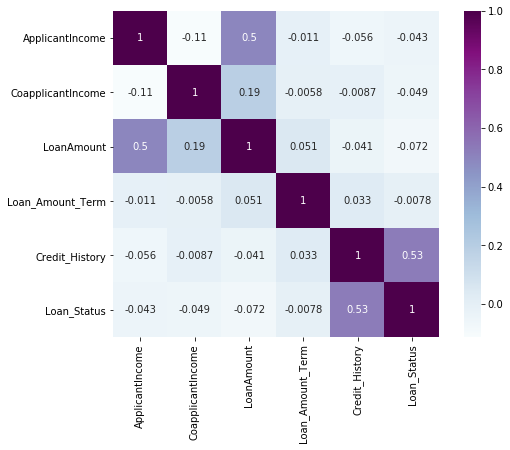

In [43]:
# calculate and visualize correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

We see that the most correlated variables are

(ApplicantIncome - LoanAmount) with correlation coefficient of 0.57

(Credit_History - Loan_Status) with correlation coefficient of 0.56

LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

# Missing value and outlier treatment

In [44]:
# check for missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

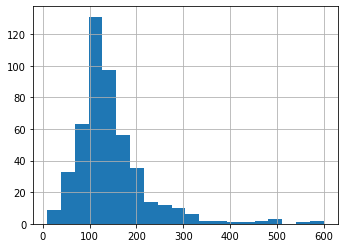

In [45]:
ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(12,4))

In [46]:
# Removing skewness in LoanAmount variable by log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])

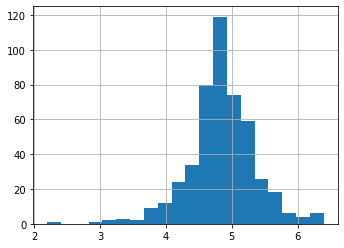

In [47]:
# after log transformation

ax1 = plt.subplot(121)
df['LoanAmount_log'].hist(bins=20, figsize=(12,4))

In [48]:
#Removing the Loan_ID column
df = df.drop(['Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249


In [49]:
# adding dummies to the dataset
df = pd.get_dummies(df)
df.shape

(480, 22)

In [53]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,5.587249,0,1,0,...,0,0,1,1,0,0,1,0,0,1


In [54]:
#taking the Loan_Status column to the end
mid = df['Loan_Status']
df.drop(labels=['Loan_Status'], axis=1,inplace = True)
df.insert(21, 'Loan_Status', mid)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,1,0,0,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,1,1,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,1,0,1,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,5.587249,0,1,0,1,...,0,1,1,0,0,1,0,0,1,1


# Model Building

In [56]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
x.shape

(480, 21)

In [57]:
y.shape

(480,)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [62]:
scoring='accuracy'

In [63]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [65]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=42)
    cv_result=cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.802083 0.046817
tree 0.718750 0.037558
lda 0.804167 0.047690
svc 0.695833 0.044876
knn 0.645833 0.048412
nb 0.785417 0.041719


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8229166666666666
[[11 17]
 [ 0 68]]
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



# ROC_AUC_Curve for SVC

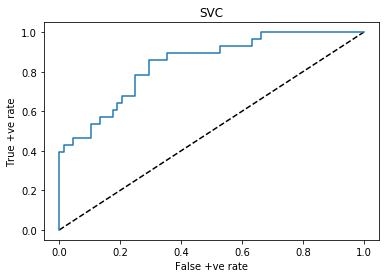

In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=svc.predict_proba(x_test)[:,0]
y_pred_prob

tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
tpr
fpr
thresholds

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False +ve rate')
plt.ylabel('True +ve rate')
plt.title('SVC')
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200,random_state=45)
rf.fit(x_train,y_train)

print(rf.score(x_train,y_train))

pred=rf.predict(x_test)
pred

1.0


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [71]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)

print(model.score(x_train,y_train))

abpred=rf.predict(x_test)
abpred

0.859375


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

print(model.score(x_train,y_train))

gbpred=rf.predict(x_test)
gbpred

0.8958333333333334


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [73]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(svc,'loan_predictor.pkl')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['loan_predictor.pkl']